# Figures S10 and S11

This notebook loads the data and produces figure S10 and S11. 

In [1]:
savedate = '20251031'

In [2]:
data_path = '' # path to data
figure_data_folder = '' # save the data from the data repository here in a subfolder called "FigureData"

In [3]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None 
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load and process data

In [4]:
# Load data
df_bg_level = pd.read_csv(data_path + '23_level_BG_US_imputedquantiles_20250722.zip',dtype={'GEOID':str,'STATEFP':str,'COUNTYFP':str,'BGFIPS':str},index_col=0)
df_bg_level['STATEFP'] = df_bg_level['STATEFP'].str.zfill(2)
df_bg_level['COUNTYFP'] = df_bg_level['COUNTYFP'].str.zfill(5)

# Mapping for cluster column names
label_mapping = {}
label_mapping['Column Names'] = {0:'University_college_campuses', 
                                 1:'Weekday_daytime_short_stops', 
                                 2:'City_neighborhoods', 
                                 3:'Weekday_daytime_long_stops', 
                                 4:'Gas_stations_very_short_stops', 
                                 5:'Weekend_evening_recreation', 
                                 6:'High_density_city', 
                                 7:'Hotels'}
cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]
cluster_cols = ['no_stations_k8_'+label_mapping['Column Names'][i] for i in range(8)]
cluster_order_names = [label_mapping['Column Names'][i] for i in cluster_order_numbers8_v3]

# Calculate counts using US-level quantiles
cts_county_US = df_bg_level.groupby(['income_quantile_county_US_imputed'])[cluster_cols].sum()
cts_bg_US = df_bg_level.groupby(['income_quantile_bg_US_imputed'])[cluster_cols].sum()

# Reload data for S11 (state-level quantiles)
cts_county = pd.read_csv(figure_data_folder + 'FigureData/figure4a_county.csv', index_col=0)
cts_bg = pd.read_csv(figure_data_folder + 'FigureData/figure4b_bg.csv', index_col=0)
cts_bg_low = pd.read_csv(figure_data_folder + 'FigureData/figure4c_low.csv', index_col=0)['0']
cts_bg_high = pd.read_csv(figure_data_folder + 'FigureData/figure4c_high.csv', index_col=0)['0']

# Calculate values to normalize
normvals_county = cts_county.sum(axis=1).loc[[1, 2, 3, 4, 5]]
normvals_bg = cts_bg.sum(axis=1).loc[[1, 2, 3, 4, 5]]
normvals_low = cts_bg_low.sum()
normvals_high = cts_bg_high.sum()
normvals_bg_US = cts_bg_US.sum(axis=1).loc[[1, 2, 3, 4, 5]]
normvals_county_US = cts_county_US.sum(axis=1).loc[[1, 2, 3, 4, 5]]

## Figure S10
Version of Figure 4ab with state-level quantiles.

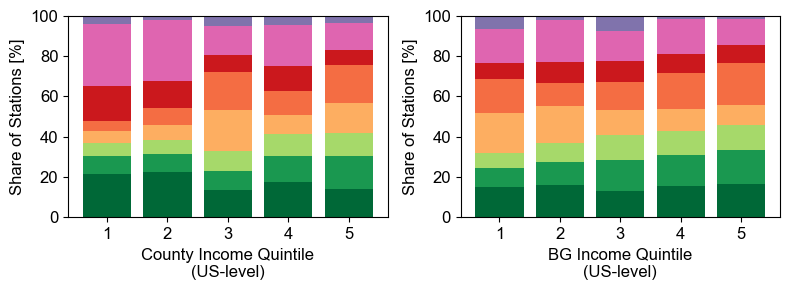

In [5]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(8, 3), width_ratios=[1,1])
xvals = [1,2,3,4,5]

colours_dict8_v3 = {1:'#006837',
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                    0:'#8073ac'}

# County-level (US-level quantiles)
bottoms = np.zeros((5,))
for j in range(8):
    tmp = cts_county['no_stations_k8_'+cluster_order_names[j]].copy().loc[[1,2,3,4,5]]
    for key in normvals_county.keys():
        tmp[key] = tmp[key] / normvals_county[key]
    axes[0].bar(xvals, [tmp[k] for k in xvals], bottom=bottoms, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    bottoms += tmp.values
axes[0].set_xticks([1,2,3,4,5])
axes[0].set_xticklabels([1,2,3,4,5], fontsize=12)

# BG-level (US-level quantiles)
bottoms = np.zeros((5,))
for j in range(8):
    tmp = cts_bg['no_stations_k8_'+cluster_order_names[j]].copy().loc[[1, 2, 3, 4, 5]]
    for key in normvals_bg.keys():
        tmp[key] = tmp[key] / normvals_bg[key]
    axes[1].bar(xvals, [tmp[k] for k in xvals], bottom=bottoms, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    bottoms += tmp.values
axes[1].set_xticks([1,2,3,4,5])
axes[1].set_xticklabels([1,2,3,4,5], fontsize=12)

# Labels
axes[0].set_xlabel('County Income Quintile\n(US-level)', fontsize=12)
axes[1].set_xlabel('BG Income Quintile\n(US-level)', fontsize=12)

for i in range(2):
    axes[i].set_ylabel('Share of Stations [%]', fontsize=12)
    axes[i].set_ylim([0,1])
    axes[i].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes[i].set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=12)

plt.tight_layout()
plt.savefig('Figures/figureS10_share_by_quantile_snapshot_few_USlevel_'+savedate+'.pdf', bbox_inches='tight')
plt.savefig('Figures/figureS10_share_by_quantile_snapshot_few_USlevel_'+savedate+'.png', bbox_inches='tight', dpi=400)
plt.show()


## Figure S11
Version of Figure 4abc with annotated values.

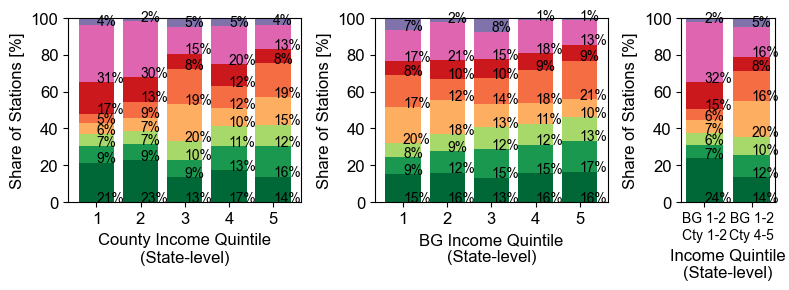

In [6]:
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(8, 3), width_ratios=[1,1,0.4])
xvals = [1,2,3,4,5]

# County-level (State-level quantiles)
bottoms = np.zeros((5,))
for j in range(8):
    tmp = cts_county['no_stations_k8_'+cluster_order_names[j]].copy().loc[[1,2,3,4,5]]
    for key in normvals_county.keys():
        tmp[key] = tmp[key] / normvals_county[key]
    axes[0].bar(xvals, [tmp[k] for k in xvals], bottom=bottoms, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    for k in xvals:
        axes[0].annotate(str(int(np.round(100*tmp[k])))+'%', (k, bottoms[k-1]))
    bottoms += tmp.values
axes[0].set_xticks([1,2,3,4,5])
axes[0].set_xticklabels([1,2,3,4,5], fontsize=12)

# BG-level (State-level quantiles)
bottoms = np.zeros((5,))
for j in range(8):
    tmp = cts_bg['no_stations_k8_'+cluster_order_names[j]].copy().loc[[1, 2, 3, 4, 5]]
    for key in normvals_bg.keys():
        tmp[key] = tmp[key] / normvals_bg[key]
    axes[1].bar(xvals, [tmp[k] for k in xvals], bottom=bottoms, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    for k in xvals:
        axes[1].annotate(str(int(np.round(100*tmp[k])))+'%', (k, bottoms[k-1]))
    bottoms += tmp.values
axes[1].set_xticks([1,2,3,4,5])
axes[1].set_xticklabels([1,2,3,4,5], fontsize=12)

# Cross cases - low county-level income
bottom = 0
for j in range(8):
    axes[2].bar([1], cts_bg_low['no_stations_k8_'+cluster_order_names[j]]/normvals_low, bottom=bottom, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    axes[2].annotate(str(int(np.round(100*cts_bg_low['no_stations_k8_'+cluster_order_names[j]]/normvals_low)))+'%', (1, bottom))
    bottom += cts_bg_low['no_stations_k8_'+cluster_order_names[j]]/normvals_low

# Cross cases - high county-level income
bottom = 0
for j in range(8):
    axes[2].bar([2], cts_bg_high['no_stations_k8_'+cluster_order_names[j]]/normvals_high, bottom=bottom, 
                color=colours_dict8_v3[cluster_order_numbers8_v3[j]])
    axes[2].annotate(str(int(np.round(100*cts_bg_high['no_stations_k8_'+cluster_order_names[j]]/normvals_high)))+'%', (2, bottom))
    bottom += cts_bg_high['no_stations_k8_'+cluster_order_names[j]]/normvals_high

axes[2].set_xticks([1,2])
axes[2].set_xticklabels(['BG 1-2\nCty 1-2', 'BG 1-2\nCty 4-5'], fontsize=10)

# Labels
axes[0].set_xlabel('County Income Quintile\n(State-level)', fontsize=12)
axes[1].set_xlabel('BG Income Quintile\n(State-level)', fontsize=12)
axes[2].set_xlabel('Income Quintile\n(State-level)', fontsize=12)

for i in range(3):
    axes[i].set_ylabel('Share of Stations [%]', fontsize=12)
    axes[i].set_ylim([0,1])
    axes[i].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes[i].set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=12)

plt.tight_layout()
plt.savefig('Figures/figureS11_share_by_quantile_snapshot_few_CROSS_ANNOTATED_'+savedate+'.pdf', bbox_inches='tight')
plt.savefig('Figures/figureS11_share_by_quantile_snapshot_few_CROSS_ANNOTATED_'+savedate+'.png', bbox_inches='tight', dpi=400)
plt.show()
